## Searching for GWs using a PTA
This notebook looks at how to search for GWs using a PTA and a Kalman filter.


---


First lets create some observations


In [57]:
%load_ext autoreload
%autoreload 2

import sys
try:
    sys.path.remove("../src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package


from configs.config import canonical as cfg
from create_synthetic_data import PulsarFrequencyObservations




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np 
dt   = cfg["timing_parameters"]["dt_days"] 
Tend = cfg["timing_parameters"]["T_years"]     
t    = np.arange(0.0,Tend*365*24*3600,dt*24*3600) #time runs from 0 to Tend, with intervals dt 

observations = PulsarFrequencyObservations(t)              # initialise the class, all observations have same times
observations.create_observations(cfg["pulsar_parameters"],
                                    cfg["GW_parameters"],
                                    cfg["noise_parameters"])  # generate the observations. You can also plot this as e.g. observations.plot_observations(psr_index=2,KF_predictions = None) 


The magnitude of the GW strain using these parameters is: 2.5e-11
GW direction: [-0.29192658 -0.45464871 -0.84147098]
mean observatins 99.9999984244955


In [64]:
state_data = observations.state_frequency[:,1]
measured_data = observations.observations
measured_data_noiseless = observations.observations_noiseless
print(np.max(state_data) - np.min(state_data))
print(np.max(state_data) - np.min(state_data))
print(np.max(state_data) - np.min(state_data))

3.1510067799445096e-06


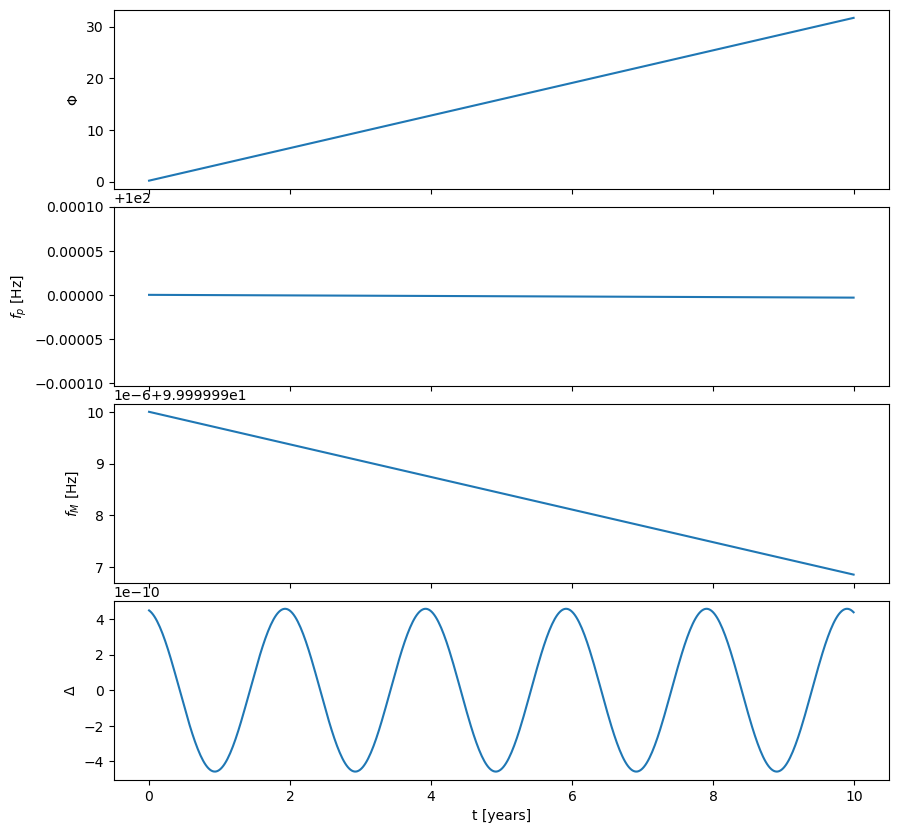

In [59]:
observations.plot_observations(psr_index=1,KF_predictions = None) #Can plot this

In [44]:
x = np.random.randn(3)



x = np.random.randn(3)  # take a random vector
x -= x.dot(GW_direction) * GW_direction



NameError: name 'GW_direction' is not defined

In [9]:
x

array([-0.3106765 ,  0.3247406 ,  0.81374795])

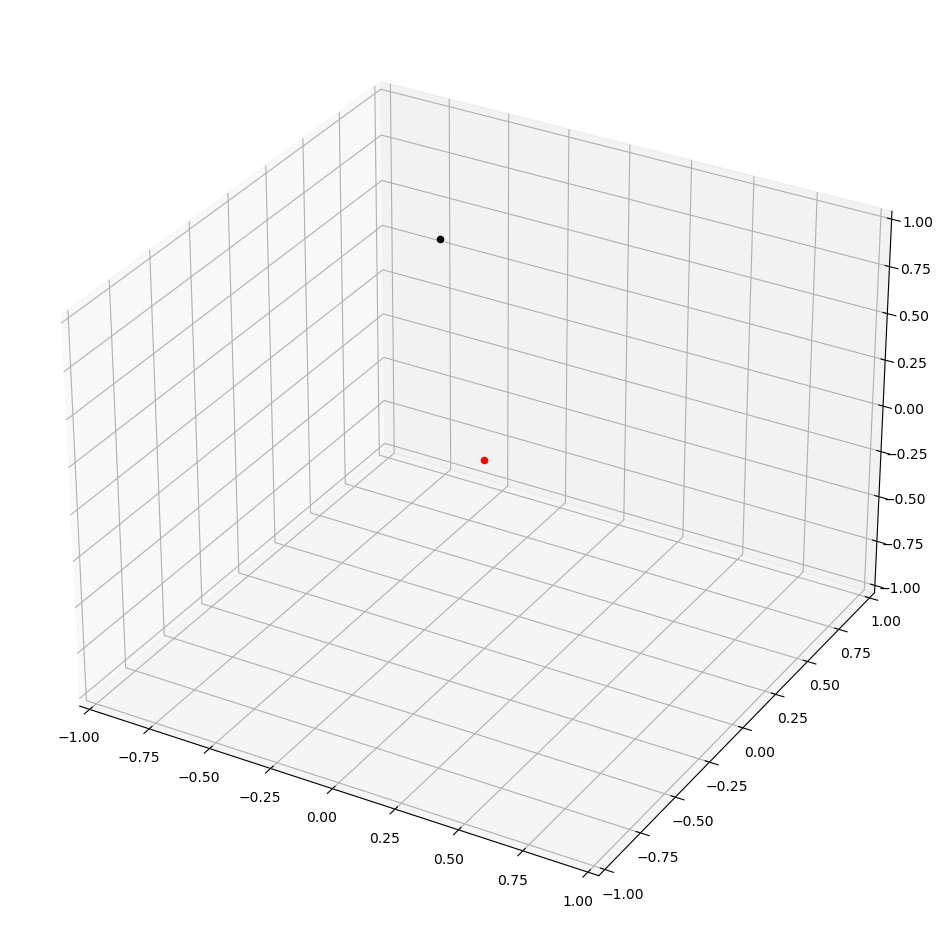

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')



ax.scatter(0, 0, 0,c='r')
ax.scatter(GW_direction[0],GW_direction[1],GW_direction[2],c='k')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)

plt.show()